<a href="https://colab.research.google.com/github/moinul-hossain-dhrubo/Power-BI-projects/blob/main/Master_Course_Screening_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
The purpose of this assignment is to assess my understanding of the fundamental concepts in data science and to test my ability to explore, analyze, and visualize a dataset. By completing this assignment, I will demonstrate my skills in data cleaning, data manipulation, and data visualization, as well as in basic statistical analysis.


In [21]:
# importing necessary libararies

# Everyday data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import libraries to perform statistical analysis

import scipy.stats as stats
import math

import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

##**Task 2** : Load the dataset into a pandas dataframe and display the first 10 rows.

In [22]:
# Loading dataset into pandas dataframe with first 10 rows

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


##**Task 3** : Perform exploratory data analysis.

In [23]:
#checking null values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [24]:
#checking data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [25]:
#counting the percentage of unique values in each column

print(df["gender"].value_counts(normalize=True) * 100)
print(df["race/ethnicity"].value_counts(normalize=True) * 100)
print(df["parental level of education"].value_counts(normalize=True) * 100)
print(df["lunch"].value_counts(normalize=True) * 100)
print(df["test preparation course"].value_counts(normalize=True) * 100)

female    51.8
male      48.2
Name: gender, dtype: float64
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64
standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64
none         64.2
completed    35.8
Name: test preparation course, dtype: float64


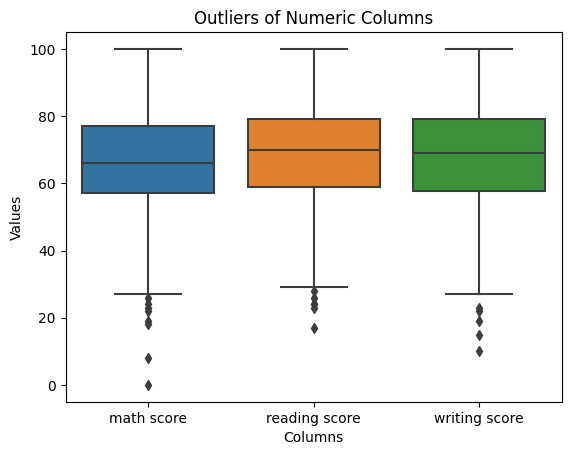

In [26]:
#plotting outliers in boxplot

sns.boxplot(data=df[['math score', 'reading score', 'writing score']], showfliers=True)

# Set plot title and axis labels
plt.title('Outliers of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [27]:
#checking and removing outliers using IQR(threshold = 1.5)


#columns with numeric values
columns_int = ['math score', 'reading score', 'writing score']

# Calculate the IQR for each numeric column in the dataframe

Q1 = df[columns_int].quantile(0.25)

Q3 = df[columns_int].quantile(0.75)

IQR = Q3 - Q1

# Print the shape of the dataframe before removing the outliers
print("The shape of the dataframe before removing the outliers is " + str(df.shape))

# Remove the outliers from the dataframe
df_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the dataframe after removing the outliers
print("The shape of the dataframe after removing the outliers is " + str(df_1.shape))

The shape of the dataframe before removing the outliers is (1000, 8)
The shape of the dataframe after removing the outliers is (988, 8)


In [28]:
#Generating descriptive statistics for the numerical columns

df_1.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [29]:
#checking info of the new dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       988 non-null    object
 1   race/ethnicity               988 non-null    object
 2   parental level of education  988 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      988 non-null    object
 5   math score                   988 non-null    int64 
 6   reading score                988 non-null    int64 
 7   writing score                988 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.5+ KB


##**Task 4** : Perform data visualization.

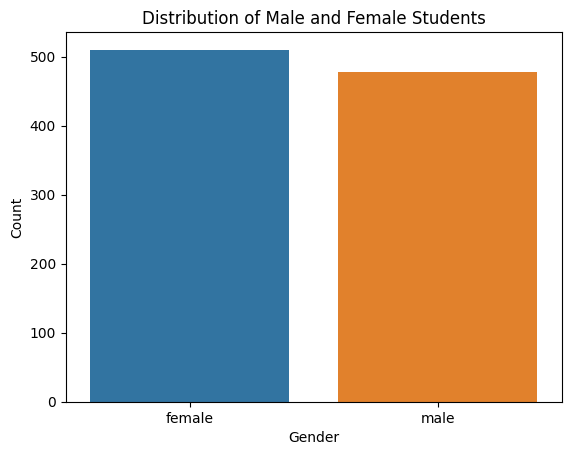

In [30]:
#Creating a bar plot to show the distribution of male and female students:
#Visulaize in Seaborn

sns.countplot(data=df_1, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')
plt.show()

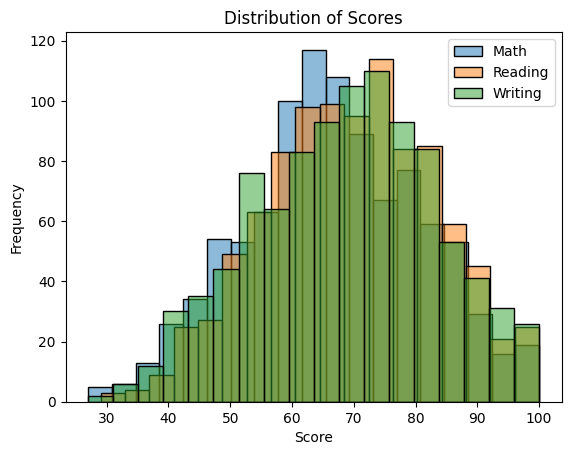

In [31]:
#Creating a histogram to show the distribution of the scores in math, reading, and writing.
#Visulaize in Seaborn

sns.histplot(data=df_1, x='math score', alpha=0.5, label='Math')
sns.histplot(data=df_1, x='reading score', alpha=0.5, label='Reading')
sns.histplot(data=df_1, x='writing score', alpha=0.5, label='Writing')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend()
plt.show()

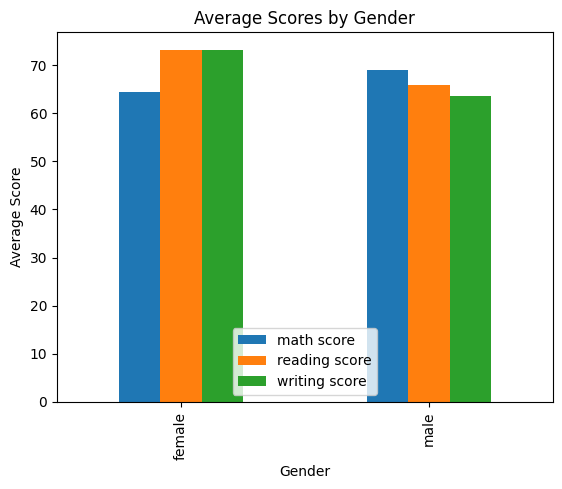

In [32]:
#Creating a bar plot to show the average scores in math, reading, and writing for each gender:

gender_scores = df_1.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Scores by Gender')
plt.show()

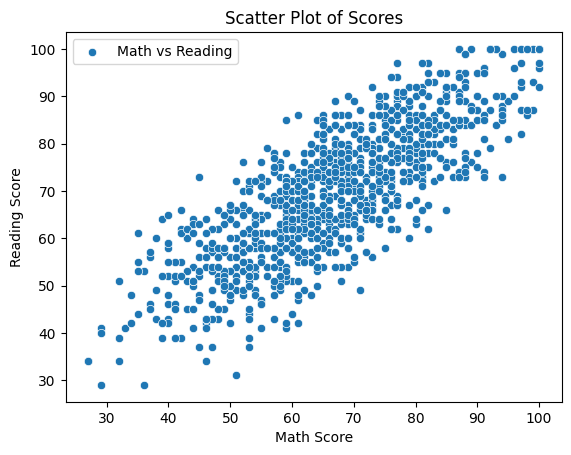

In [34]:
# Creating a scatter plot to show the relationship between math, reading, and writing scores:
# Visulaize in Seaborn

sns.scatterplot(data=df_1, x='math score', y='reading score', label='Math vs Reading')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Scatter Plot of Scores')
plt.legend()
plt.show()

##Task 5 : Perform basic statistical analysis.

In [15]:
#Calculating mean, median, and mode for math, reading, and writing scores:

mean_scores = df_1[['math score', 'reading score', 'writing score']].mean().round(2)
median_scores = df_1[['math score', 'reading score', 'writing score']].median().round(2)
mode_scores = df_1[['math score', 'reading score', 'writing score']].mode().round(2)

print('Mean Scores:')
print(mean_scores)
print('\nMedian Scores:')
print(median_scores)
print('\nMode Scores:')
print(mode_scores)

Mean Scores:
math score       66.63
reading score    69.64
writing score    68.57
dtype: float64

Median Scores:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode Scores:
   math score  reading score  writing score
0          65             72             74


In [16]:
# Calculating the standard deviation for math, reading, and writing scores:

std_scores = df_1[['math score', 'reading score', 'writing score']].std().round(2)
print('Standard Deviation:')
print(std_scores)

Standard Deviation:
math score       14.41
reading score    14.02
writing score    14.53
dtype: float64


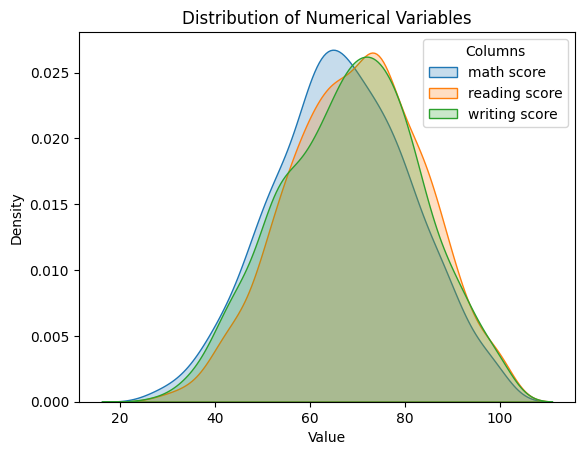

In [17]:
#checking distribution of the numeric columns

numeric_columns = df_1.select_dtypes(include=['float', 'int'])

# Create a figure and axes object
fig, ax = plt.subplots()

# Plotting KDE plot for each numerical column in the dataframe
for column in numeric_columns:
    sns.kdeplot(data=df_1[column], shade=True, ax=ax, label=column)

# Set plot title and labels
plt.title("Distribution of Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Density")

plt.legend(title="Columns")

# Display the plot
plt.show()



---


* Because the mean, median, and modes are so near, our score distribution is Normal, Symmetric, and Unimodal. This implies that around 68% of the scores are within (mean +- 1* standard deviation) and 95% are within (mean +- 2* standard deviation).

---



### **Two sample T-test**

Null Hypothesis: The math scores and reading scores are from the same population distribution.

Alternative Hypothesis : The math scores and reading scores are from different population distributions.

In [18]:
# Checking means for both groups

math_mean = df_1['math score'].mean()
read_mean = df_1['reading score'].mean()

print(math_mean)
print(read_mean)

66.6255060728745
69.64068825910931


In [20]:
# Perfroming two sample t-test

(test_ind, p_value) = stats.ttest_ind(a= df_1['math score'],
                                      b= df_1['reading score'],
                                      equal_var=False)    # Assume samples have equal variance

if p_value < 0.05:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

print(f'p-value = ',p_value)
print(f't statistic = ',test_ind)

we reject the null hypothesis
p-value =  2.59103732705847e-06
t statistic =  -4.714628821906379




---
The math scores and reading scores are from different population distributions.

---


**Null Hypothesis :** Male and Female reading scores are not from different distributions

**Alternative Hypothesis** : Male and Female reading scores are from different population distribution

In [ ]:
#Separating two groups

male_read_scores = df_1[df_1['gender'] == 'male']['reading score']
female_read_scores = df_1[df_1['gender'] == 'female']['reading score']

In [ ]:
#Performing two sample t-test

(test_ind, p_value) = stats.ttest_ind(a= male_read_scores,
                                      b= female_read_scores,
                                      equal_var=False)    # Assume samples have equal variance

if p_value < 0.05:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

print(f'p-value = ',p_value)
# print(f't statistic = ',test_stat)

we reject the null hypothesis
p-value =  2.6052257840994235e-17




---

Male and Female reading scores are from different population distribution

---


###**One sample T test**

Null Hypothesis : There is no significant difference between the male math scores and the overall math score distribution

Alternative Hypothesis : The male math scores are different from the overall math score distribution

In [ ]:
male_math_score = df_1[df_1['gender'] == 'male']['math score']
pop_math_score = df_1['math score']

print(male_math_score.shape)

(478,)


In [ ]:
# performing t-test

test_stat, p_value = stats.ttest_1samp(a = male_math_score,         # Sample data
                     popmean = pop_math_score.mean())               # Pop me

print(test_stat, p_value)

3.784092941054434 0.0001739077183251102


In [ ]:
lower_quantile = stats.t.ppf(q=0.025,   # Quantile to check
                 df=477)                # Degrees of freedom


upper_quantile = stats.t.ppf(q=0.975,   # Quantile to check
                 df=477)                # Degrees of freedom

print(lower_quantile, upper_quantile)

-1.9649497280744153 1.9649497280744148


In [ ]:
# Finding confidence interval at 95%

sigma = male_math_score.std()/math.sqrt(478)  # Sample stdev/sample size

interval = stats.t.interval(0.95,              # Confidence level
                 df = 477,                     # Degrees of freedom (n - 1)
                 loc = male_math_score.mean(), # Sample mean
                 scale= sigma)                 # Standard dev estimate

print(pop_math_score.mean())
print(interval)

66.6255060728745
(67.7891325580184, 70.30291765118662)


In [ ]:
# making decisions

if p_value < 0.05:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

if test_stat < lower_quantile or test_stat > upper_quantile:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')
if pop_math_score.mean() < interval[0] or pop_math_score.mean() > interval[1]:
  print("We reject the null hypothesis")
else :
  print('we failed to reject the null hypothesis')

we reject the null hypothesis
we reject the null hypothesis
We reject the null hypothesis


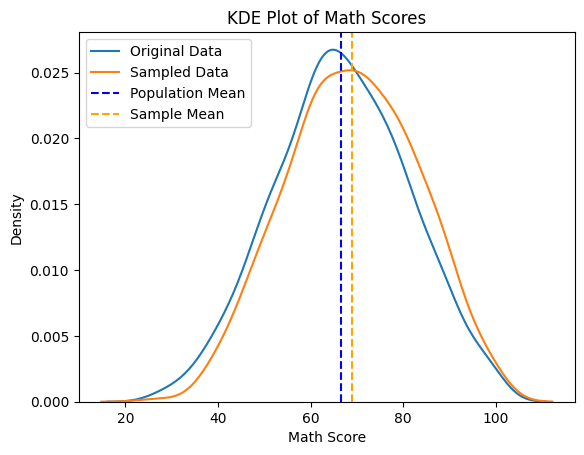

In [ ]:
# visualizing popoulation and sample distribution

sns.kdeplot(pop_math_score, label='Original Data')
sns.kdeplot(male_math_score, label='Sampled Data')
plt.axvline(pop_math_score.mean(), color='blue', linestyle='--', label='Population Mean')
plt.axvline(male_math_score.mean(), color='orange', linestyle='--', label='Sample Mean')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.title('KDE Plot of Math Scores')
plt.legend()
plt.show()



---

The male math scores are different from the Overall math score distribution

---



###**ANOVA test**

Null Hypothesis : The parental level of education does not have a significant effect on the mean writing scores.

Alternative Hypothesis : The parental level of education has a significant effect on the mean writing scores.

In [ ]:
# Group writing score data by parental level of education

dataframe = {'Parental education' : df_1['parental level of education'] , 'Writing scores' : df_1['writing score']}
data = pd.DataFrame(dataframe)

groups = data.groupby('Parental education').groups

# Etract individual groups
bachelor = df_1['writing score'][groups["bachelor's degree"]]
masters = df_1['writing score'][groups["master's degree"]]
associate = df_1['writing score'][groups["associate's degree"]]
some_sollege = df_1['writing score'][groups["some college"]]
high_school = df_1['writing score'][groups["high school"]]
some_high_school = df_1['writing score'][groups["some high school"]]

# Perform the ANOVA
F_stat, p_value = stats.f_oneway(bachelor, masters, associate, some_sollege, high_school, some_high_school)

print(p_value)

if p_value < 0.05:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

5.685043306239461e-13
we reject the null hypothesis




---

The parental level of education has a significant effect on the mean writing scores.

---


##**Task 6** : Documenting my findings

In [ ]:
df_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###Finding out if results vary if a student completes a test preparation course


In [ ]:
# Let's split the dataset accroding to the values of test preparation course column

completed_df = df_1[df_1['test preparation course'] == 'completed']
none_df = df_1[df_1['test preparation course'] == 'none']

In [ ]:
# Let's find out the average scores

mean_scores_completed = completed_df[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores_none = none_df[['math score', 'reading score', 'writing score']].mean().round(2)
# print(f'Students whot took a preparation test\n',mean_scores_completed)
# print(f'Students whot did not take a preparation test\n',mean_scores_none)

In [ ]:
# creating dataframe of the mean scores

completed_table = pd.DataFrame(mean_scores_completed, columns=['Mean Scores (Completed course)'])
none_table = pd.DataFrame(mean_scores_none, columns=['Mean Scores (did not complete course)'])

print(completed_table)
print(none_table)

               Mean Scores (Completed course)
math score                              69.83
reading score                           73.98
writing score                           74.53
               Mean Scores (did not complete course)
math score                                     64.81
reading score                                  67.19
writing score                                  65.19




---



* Students who took the exam preparation course performed better overall (in
math, reading, and writing).

---



####**Performing T test**
Null Hypothesis : The math scores of students that completed the test preparation course are not different from the population distribution.

Alternative Hypothesis : The samples of math scores of students that completed the test are different from the population.

Let's conduct a t-test at a 95% confidence level and 99% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [ ]:
completed_df.shape

(357, 8)

In [ ]:
# Generating sample mean and population mean

sample_completed_df = completed_df['math score']
population_mean_math_score = df_1['math score'].mean()
sample_mean_math_score = np.mean(sample_completed_df)

In [ ]:
# performing t-test

test_stat, p_value = stats.ttest_1samp(a = sample_completed_df,         # Sample data
                 popmean = population_mean_math_score)                  # Pop me

print(test_stat, p_value)

4.243733605109862 2.8073583196986977e-05


This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We will check the quantiles with stats.t.ppf():

In [ ]:
#Setting up quantiles to compare with t-statistic

lower_quantile = stats.t.ppf(q=0.025,   # Quantile to check
                 df=356)                # Degrees of freedom


upper_quantile = stats.t.ppf(q=0.975,   # Quantile to check
                 df=356)                # Degrees of freedom

print(lower_quantile, upper_quantile)

-1.9666499952118222 1.9666499952118217


In [ ]:
# Finding confidence interval at 95%

sigma = sample_completed_df.std()/math.sqrt(200)  # Sample stdev/sample size

interval = stats.t.interval(0.95,              # Confidence level
                 df = 356,                     # Degrees of freedom (n - 1)
                 loc = sample_mean_math_score, # Sample mean
                 scale= sigma)                 # Standard dev estimate

print(population_mean_math_score)
print(interval)

66.6255060728745
(67.84453005396585, 71.8081310104599)


In [ ]:
# Finding confidence interval at 99%

sigma = sample_completed_df.std()/math.sqrt(357)  # Sample stdev/sample size

interval_99 = stats.t.interval(0.99,           # Confidence level
                 df = 356,                     # Degrees of freedom (sample size - 1)
                 loc = sample_mean_math_score, # Sample mean
                 scale= sigma)                 # Standard dev estimate

print(population_mean_math_score)
print(interval_99)

if population_mean_math_score < interval_99[0] or population_mean_math_score > interval_99[1]:
  print("We reject the null hypothesis")
else :
  print('we failed to reject the null hypothesis')

66.6255060728745
(67.87304899406075, 71.779612070365)
We reject the null hypothesis


In [ ]:
# making decisions

if p_value < 0.05:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

if test_stat < lower_quantile or test_stat > upper_quantile:
  print('we reject the null hypothesis')
else :
  print('we failed to reject the null hypothesis')

if population_mean_math_score < interval[0] or population_mean_math_score > interval[1]:
  print("We reject the null hypothesis")
else :
  print('we failed to reject the null hypothesis')

we reject the null hypothesis
we reject the null hypothesis
We reject the null hypothesis


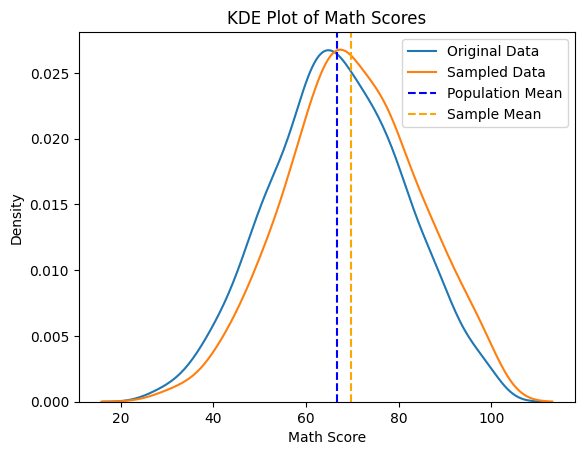

In [ ]:
# visualizing popoulation and sample distribution

sns.kdeplot(df_1['math score'], label='Original Data')
sns.kdeplot(sample_completed_df, label='Sampled Data')
plt.axvline(population_mean_math_score, color='blue', linestyle='--', label='Population Mean')
plt.axvline(sample_mean_math_score, color='orange', linestyle='--', label='Sample Mean')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.title('KDE Plot of Math Scores')
plt.legend()
plt.show()



---
At 95% confidence level,
we reject the null hypothesis

At 99% confidence level,
we reject the null hypothesis

---



###Finding out if there is any difference between male and female scores

###Defining Function

In [ ]:
#Lets's define a function to calculate the means of scores for each unique values of the desired column

def calculate_mean_by_category(df, column_name):
    unique_values = df[column_name].unique()
    mean_scores = {}

    for value in unique_values:
        subset_df = df[df[column_name] == value]
        mean_scores[value] = subset_df[['math score', 'reading score', 'writing score']].mean().round(2)

    return pd.DataFrame(mean_scores)

In [ ]:
calculate_mean_by_category(df_1, 'gender')

,female,male
math score,64.36,69.05
reading score,73.23,65.81
writing score,73.16,63.67


In [ ]:
# Now let's see the differnce between male and female who has completed test preparation course and who didn't

#male and female who completed the course

male_df_completed = df_1[(df_1['gender'] == 'male') & (df_1['test preparation course'] == 'completed')]
female_df_completed = df_1[(df_1['gender'] == 'female') & (df_1['test preparation course'] == 'completed')]

mean_scores_male_completed = male_df_completed[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores_female_completed = female_df_completed[['math score', 'reading score', 'writing score']].mean().round(2)

#male and female who didn't complete the course

male_df_none = df_1[(df_1['gender'] == 'male') & (df_1['test preparation course'] == 'none')]
female_df_none = df_1[(df_1['gender'] == 'female') & (df_1['test preparation course'] == 'none')]

mean_scores_male_none = male_df_none[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores_female_none = female_df_none[['math score', 'reading score', 'writing score']].mean().round(2)

#creating DataFrame

male_table_completed = pd.DataFrame(mean_scores_male_completed, columns=['Mean Scores (Male Completed)'])
female_table_completed = pd.DataFrame(mean_scores_female_completed, columns=['Mean Scores (Female Completed)'])

male_table_none = pd.DataFrame(mean_scores_male_none, columns=['Mean Scores (Male not completed)'])
female_table_none = pd.DataFrame(mean_scores_female_none, columns=['Mean Scores (Female not completed)'])

#printing results

print(male_table_completed)
print(female_table_completed)
print(male_table_none)
print(female_table_none)

               Mean Scores (Male Completed)
math score                            72.34
reading score                         70.21
writing score                         69.79
               Mean Scores (Female Completed)
math score                              67.44
reading score                           77.56
writing score                           79.03
               Mean Scores (Male not completed)
math score                                67.16
reading score                             63.29
writing score                             60.16
               Mean Scores (Female not completed)
math score                                  62.63
reading score                               70.81
writing score                               69.87


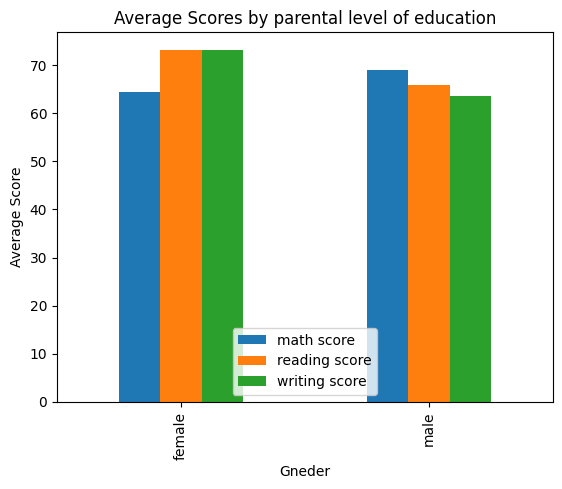

In [ ]:
# Calculate the mean scores for each category
mean_scores_gender = df_1.groupby('gender')[['math score','reading score','writing score']].mean()

mean_scores_gender.plot(kind='bar')

plt.xlabel('Gneder')
plt.ylabel('Average Score')
plt.title('Average Scores by parental level of education')

plt.show()



---


* Males outperformed females in math, while females outperformed males in both reading and writing.

* Males who took the exam preparation course performed better in mathematics than girls who took the course but performed worse in reading and writing.

* Males who did not take the exam preparation course performed better in mathematics than females who did not take the course but performed worse in reading and writing.

* Both males and females who took the preparation course performed better on all three tests than those who did not.

* Males who did not complete the course and females who completed the course scored the same in math.

---

### Does parental level education affects the score? Let's find out

In [ ]:
calculate_mean_by_category(df_1, 'parental level of education')

,bachelor's degree,some college,master's degree,associate's degree,high school,some high school
math score,69.39,67.87,69.75,68.07,62.79,64.54
reading score,73.00,70.14,75.37,71.11,65.23,67.82
writing score,73.38,69.58,75.68,70.04,63.04,65.87


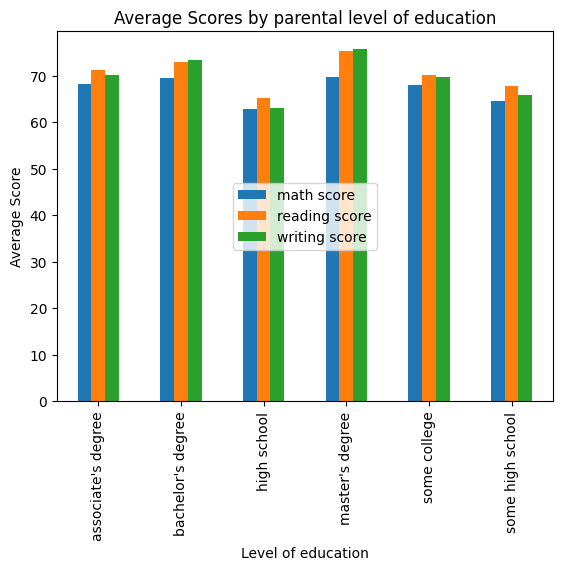

In [ ]:
# Calculate the mean scores for each category
mean_scores_parental = df_1.groupby('parental level of education')[['math score','reading score','writing score']].mean()

mean_scores_parental.plot(kind='bar')

plt.xlabel('Level of education')
plt.ylabel('Average Score')
plt.title('Average Scores by parental level of education')

plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5))
plt.show()



---


* Students' test scores tend to fall when their parents are less educated than others. Though 'some high school' labeled students scored higher than 'high school' labeled students.

---

###Does ethnicity groups has impact on scores?

In [ ]:
calculate_mean_by_category(df_1, 'race/ethnicity')

,group B,group C,group A,group D,group E
math score,64.86,64.90,62.01,67.52,74.14
reading score,68.46,69.49,65.15,70.18,73.37
writing score,66.86,68.25,63.17,70.27,71.76


In [ ]:
#Let's find out the correlations

score_columns = ['math score', 'reading score', 'writing score']

# Convert the "Group" column to a numeric representation
group_numeric = pd.Categorical(df['race/ethnicity']).codes

correlation_scores = {}

for column in score_columns:
    correlation = pd.Series(group_numeric).corr(df_1[column])
    correlation_scores[column] = correlation.round(2)

print(correlation_scores)


{'math score': 0.21, 'reading score': 0.14, 'writing score': 0.16}


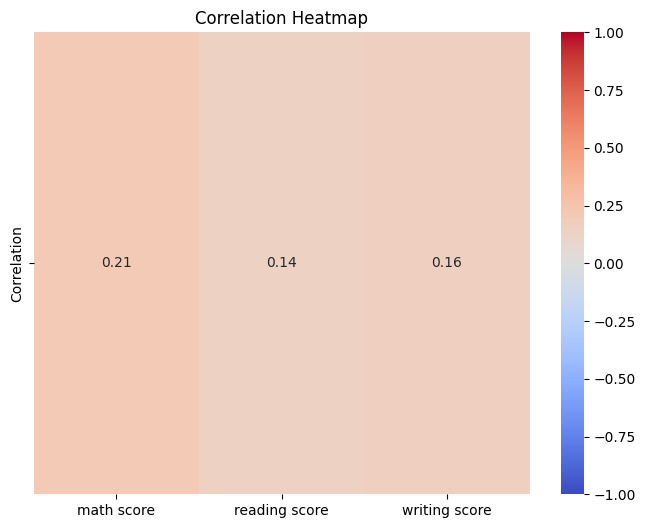

In [ ]:
# Create a correlation dataframe from the correlation_scores dictionary
correlation_df = pd.DataFrame(correlation_scores, index=['Correlation'])

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

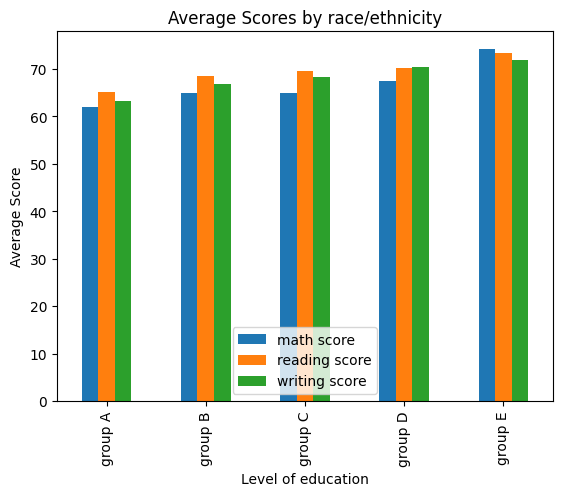

In [ ]:
# Calculate the mean scores for each category
mean_scores_race = df_1.groupby('race/ethnicity')[['math score','reading score','writing score']].mean()

mean_scores_race.plot(kind='bar')

plt.xlabel('Level of education')
plt.ylabel('Average Score')
plt.title('Average Scores by race/ethnicity')

plt.show()


---

* Average ethnicity group scores in all three scores: Group E is the highest followed by Group D, Group C, Group B and Group A.


---



### Does differnent type of lunch has impact on the scores?

In [ ]:
calculate_mean_by_category(df_1, 'lunch')

,standard,free/reduced
math score,70.18,60.01
reading score,71.78,65.66
writing score,70.96,64.11


In [ ]:
# Now let's see the differnce between lunch groups where the student has completed test preparation course and who didn't

#lunch groups who completed the course

std_df_completed = df_1[(df_1['lunch'] == 'standard') & (df_1['test preparation course'] == 'completed')]
free_df_completed = df_1[(df_1['lunch'] == 'free/reduced') & (df_1['test preparation course'] == 'completed')]

mean_scores_std_completed = std_df_completed[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores_free_completed = free_df_completed[['math score', 'reading score', 'writing score']].mean().round(2)

#lunch groups who didn't complete the course

std_df_none = df_1[(df_1['lunch'] == 'standard') & (df_1['test preparation course'] == 'none')]
free_df_none = df_1[(df_1['lunch'] == 'free/reduced') & (df_1['test preparation course'] == 'none')]

mean_scores_std_none = std_df_none[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores_free_none = free_df_none[['math score', 'reading score', 'writing score']].mean().round(2)

#creating DataFrame

std_table_completed = pd.DataFrame(mean_scores_std_completed, columns=['Standard and Completed'])
free_table_completed = pd.DataFrame(mean_scores_free_completed, columns=['Free and Completed'])

std_table_none = pd.DataFrame(mean_scores_std_none, columns=['Standard and not completed'])
free_table_none = pd.DataFrame(mean_scores_free_none, columns=['Free and not completed'])

#printing results

print(std_table_completed)
print(free_table_completed)
print(std_table_none)
print(free_table_none)

               Standard and Completed
math score                      73.53
reading score                   76.22
writing score                   76.77
               Free and Completed
math score                  63.35
reading score               70.07
writing score               70.62
               Standard and not completed
math score                          68.34
reading score                       69.36
writing score                       67.79
               Free and not completed
math score                      57.99
reading score                   62.99
writing score                   60.17




---

* Students who ate regular lunch outperformed those who ate free or reduced lunch.

* Students who had a standard lunch and completed the test preparation course had the highest average compared to students who had a standard lunch and did not complete the course, students who had a free lunch and did not complete the course, and students who had a free lunch and did not complete the course.However, pupils who got free lunch and completed the course performed better in reading and writing than those who had normal lunch but did not complete the course.

---



###The correlation of the scores

In [ ]:
scores_df = df_1[['math score', 'reading score', 'writing score']]

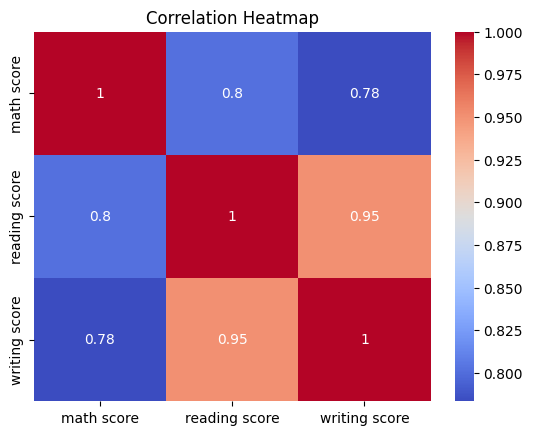

In [ ]:
correlation_matrix = scores_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()



---

* The scores exhibit a strong positive correlation with one another. That is, pupils who excel in one subject will most likely excel in another.

---



### Which features are important to train an ML model?

In [ ]:
# df_1.head(20)

In [ ]:
# Let's convert categorical values to numeric

df_1['gender'] =df_1['gender'].map({'male':1,'female':0})
df_1['race/ethnicity'] = df_1['race/ethnicity'].map({'group A' : 1,'group B' : 2, 'group C' : 3, 'group D' :4, 'group E' : 5})
df_1['test preparation course'] = df_1['test preparation course'].map({'completed' : 1, 'none' :0})
df_1['parental level of education'] = df_1['parental level of education'].map({"bachelor's degree": 5,
                                                                             'some college': 3,
                                                                             "master's degree": 6,
                                                                             "associate's degree": 4,
                                                                             'high school': 2,
                                                                             'some high school': 1})
df_1['lunch'] = df_1['lunch'].map({'standard' : 1, 'free/reduced' : 0})

# df_1.head(20)

<Axes: >

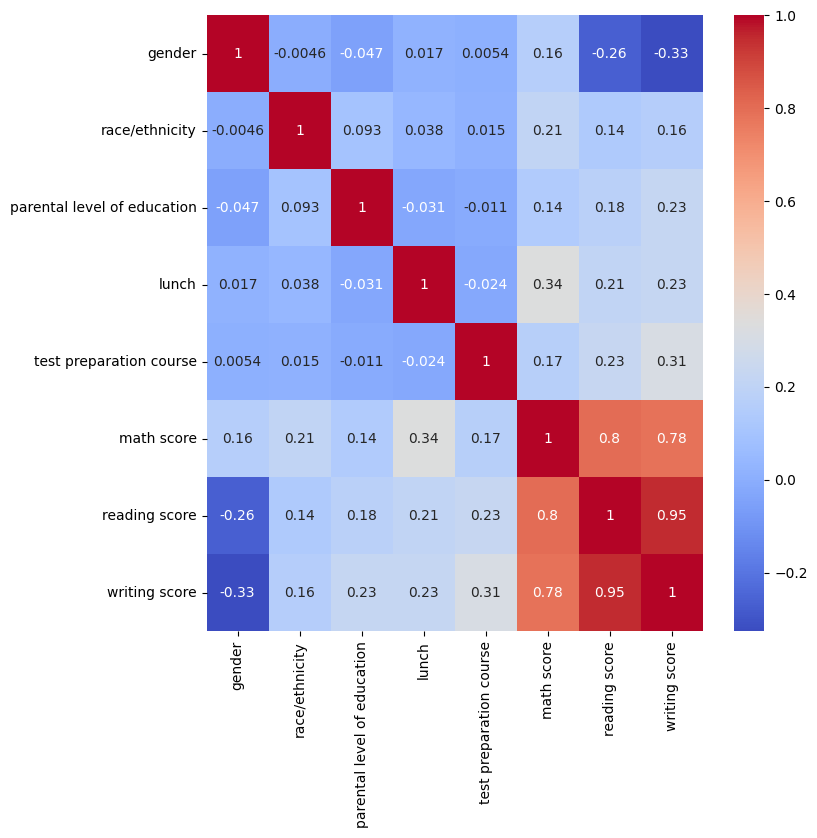

In [ ]:
#finding correlations

corrmat = df_1.corr()

plt.figure(figsize = (8,8))
sns.heatmap(corrmat, annot = True,cmap='coolwarm')



---

14. Based on the correlation matrix table, we may conclude that each column has an effect on all three test scores. As a result, we cannot ignore or drop any of the columns while training a machine learning model to predict the scores.

---



## **Insights**

**Based on average**

1. Students who took the exam preparation course performed better overall (in math, reading, and writing).

2. Males outperformed females in math, while females outperformed males in both reading and writing.


3. Males who took the exam preparation course performed better in mathematics than girls who took the course but performed worse in reading and writing.

4. Males who did not take the exam preparation course performed better in mathematics than females who did not take the course but performed worse in reading and writing.

5. Both males and females who took the preparation course performed better on all three tests than those who did not.

6. Males who did not complete the course and females who completed the course scored the same in math.


7. Students' test scores tend to fall when their parents are less educated than others. Though 'some high school' labeled students scored higher than high school students.

8. The scores exhibit a strong positive correlation with one another. That is, pupils who excel in one subject will most likely excel in another.

9. Average ethnicity group scores in all three scores: Group E is the highest followed by Group D, Group C, Group B and Group A.

10. Students who ate regular lunch outperformed those who ate free or reduced lunch.

12. Students who had a standard lunch and completed the test preparation course had the highest average compared to students who had a standard lunch and did not complete the course, students who had a free lunch and did not complete the course, and students who had a free lunch and did not complete the course.However, pupils who got free lunch and completed the course performed better in reading and writing than those who had normal lunch but did not complete the course.

13. Because the mean, median, and modes are so near, our score distribution is Normal, Symmetric, and Unimodal. This implies that around 68% of the scores are within (mean +- 1* standard deviation) and 95% are within (mean +- 2* standard deviation).

14. Based on the correlation matrix table, we may conclude that each column has an effect on all three test scores. As a result, we cannot ignore or drop any of the columns while training a machine learning model to predict the scores.

t-test, 3 scatter plots(R value), delete extras, document my findings